In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
from itertools import product

import networkx as nx
import numpy as np
from pyvis.network import Network

In [3]:
major = [1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
m_minor = [1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1]
h_minor = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]
h_major = [1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]
wholetone = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]
octatonic = [1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]
augmented = [1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]

all_scales = [major, m_minor, h_minor, h_major, wholetone, octatonic, augmented]

In [4]:
def get_transpositions(scale):
    transpositions = []

    for i in range(12):
        current_transposition = scale[-i:] + scale[:-i]
        if current_transposition not in transpositions:
            transpositions.append(current_transposition)

    return np.array(transpositions)

In [5]:
def index_to_name_base(idx):
    pass

In [6]:
all_realized_scales = np.concatenate([get_transpositions(s) for s in all_scales])

In [7]:
n_common_tones = all_realized_scales @ all_realized_scales.T

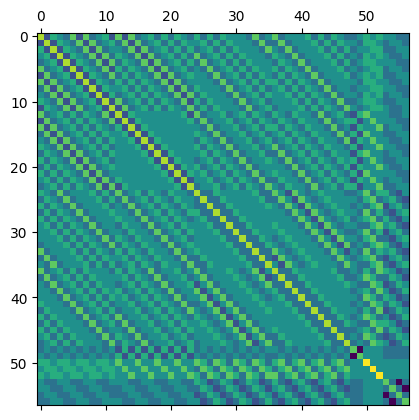

In [8]:
plt.matshow(n_common_tones)

In [9]:
n_common_tones[0, :12], n_common_tones[0, 12:24], n_common_tones[0, 24:36], n_common_tones[0, 36:48], n_common_tones[0, 48:50], n_common_tones[0, 50:53], n_common_tones[0, 53:57]

(array([7, 2, 5, 4, 3, 6, 2, 6, 3, 4, 5, 2]),
 array([6, 2, 6, 3, 4, 5, 3, 5, 3, 5, 4, 3]),
 array([5, 3, 5, 3, 5, 4, 4, 4, 3, 6, 3, 4]),
 array([6, 3, 4, 4, 4, 5, 3, 5, 3, 5, 4, 3]),
 array([3, 4]),
 array([5, 4, 5]),
 array([4, 4, 3, 3]))

In [10]:
n_common_tones[12, 12:24], n_common_tones[12, 24:36], n_common_tones[12, 36:48], n_common_tones[12, 48:50], n_common_tones[12, 50:53], n_common_tones[12, 53:57]

(array([7, 2, 5, 4, 4, 4, 4, 4, 4, 4, 5, 2]),
 array([6, 3, 4, 4, 5, 3, 4, 5, 3, 5, 4, 3]),
 array([5, 4, 3, 5, 4, 4, 3, 6, 3, 4, 5, 3]),
 array([2, 5]),
 array([6, 4, 4]),
 array([4, 3, 3, 4]))

In [11]:
n_common_tones[24, 24:36], n_common_tones[24, 36:48], n_common_tones[24, 48:50], n_common_tones[24, 50:53], n_common_tones[24, 53:57]

(array([7, 3, 3, 5, 4, 4, 4, 4, 4, 5, 3, 3]),
 array([6, 4, 2, 6, 4, 3, 4, 5, 4, 4, 4, 3]),
 array([3, 4]),
 array([6, 3, 5]),
 array([5, 3, 2, 4]))

In [12]:
n_common_tones[36, 36:48], n_common_tones[36, 48:50], n_common_tones[36, 50:53], n_common_tones[36, 53:57]

(array([7, 3, 3, 5, 4, 4, 4, 4, 4, 5, 3, 3]),
 array([4, 3]),
 array([5, 3, 6]),
 array([5, 4, 2, 3]))

In [13]:
n_common_tones[48, 48:50], n_common_tones[48, 50:53], n_common_tones[48, 53:57]

(array([6, 0]), array([4, 4, 4]), array([3, 3, 3, 3]))

In [14]:
n_common_tones[50, 50:53], n_common_tones[50, 53:57]

(array([8, 4, 4]), array([4, 4, 4, 4]))

In [15]:
pairs = np.argwhere(n_common_tones == 2)
pairs = pairs[pairs[:, 0] < pairs[:, 1]]

## Back to graphs

In [16]:
scales = 'DFKk'
colors = ['tab:red', 'tab:green', 'tab:blue', 'tab:orange']
color_table = {a: c for a, c in zip(scales, colors)}

In [17]:
# TODO: put color and label into node attributes

nodes = [(a, n) for a, n in product(scales, range(12))]
node_colors = [color_table[a[0]] for a in nodes]
node_labels = {str(a): f'${a[0]}_{{{a[1]}}}$' for a in nodes}

DG = nx.DiGraph()
DG.add_nodes_from(str(n) for n in nodes)

In [18]:
# TODO: there are duplicate edges
edges = []
for idx in range(12):
    edges.append((('D', idx), ('D', (idx+7) % 12)))
    edges.append((('D', idx), ('F', (idx+7) % 12)))
    edges.append((('D', idx), ('k', (idx) % 12)))
    edges.append((('F', idx), ('D', (idx+7) % 12)))
    edges.append((('F', idx), ('K', (idx+2) % 12)))
    edges.append((('k', idx), ('K', (idx+9) % 12)))
    edges.append((('k', idx), ('F', (idx+2) % 12)))
    edges.append((('K', idx), ('D', (idx) % 12)))

DG.add_edges_from((str(e[0]), str(e[1])) for e in edges)

In [19]:
# add irregular nodes
# wholetone
color_table['W'] = 'tab:purple'
W = [('W', 0), ('W', 1)]
node_colors.extend([color_table[a[0]] for a in W])
node_labels.update({str(a): f'${a[0]}_{{{a[1]}}}$' for a in W})
DG.add_nodes_from(str(n) for n in W)

edges = []
for idx in range(12):
    edges.append((('F', idx), ('W', (idx) % 2)))

DG.add_edges_from((str(e[0]), str(e[1])) for e in edges)

#augmented
color_table['A'] = 'tab:cyan'
A = [('A', 0), ('A', 1), ('A', 2), ('A', 3)]
node_colors.extend([color_table[a[0]] for a in A])
node_labels.update({str(a): f'${a[0]}_{{{a[1]}}}$' for a in A})
DG.add_nodes_from(str(n) for n in A)

edges = []
for idx in range(12):
    edges.append((('k', idx), ('A', (idx + 3) % 4)))
    edges.append((('K', idx), ('A', (idx + 2) % 4)))

DG.add_edges_from((str(e[0]), str(e[1])) for e in edges)

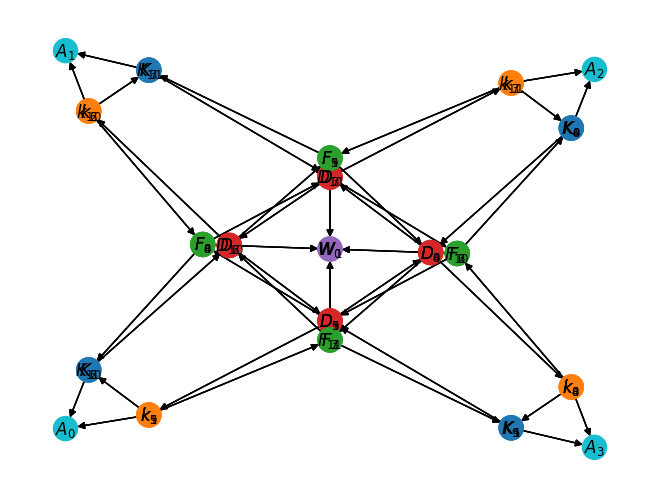

In [20]:
nx.draw(DG, pos=nx.spectral_layout(DG), labels=node_labels, node_color=node_colors)

In [21]:
net = Network(
    notebook=True,
    directed = True,
    select_menu = True,
    filter_menu = True,
    cdn_resources='in_line',
)

In [22]:
net.show_buttons()
net.from_nx(DG)
net.show('shit.html')

shit.html


In [23]:
major = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])
m_minor = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1])
h_minor = np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1])
h_major = np.array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1])
wholetone = np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0])
octatonic = np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1])
augmented = np.array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1])

families = [major, m_minor, h_minor, h_major, wholetone, octatonic, augmented]

In [24]:
def are_same_family(a, b):
    if sum(a) != sum(b):
        return False

    return max(np.correlate(a, np.concatenate((b, b)), mode='valid')) == sum(a)

In [25]:
def sharpen(a, idx):
    result = np.copy(a)
    result[idx] = 0
    result[(idx + 1) % 12] = 1

    return result

def flatten(a, idx):
    result = np.copy(a)
    result[idx] = 0
    result[(idx - 1) % 12] = 1

    return result

In [26]:
def available_modifications(scale):
    print('sharps')
    for idx in np.argwhere(scale == 1):
        if scale[(idx + 1) % 12] == 0:
            new_scale = sharpen(scale, idx)
            if any(are_same_family(new_scale, other) for other in families):
                print(idx)
    print('flats')
    for idx in np.argwhere(scale == 1):
        if scale[(idx - 1) % 12] == 0:
            new_scale = flatten(scale, idx)
            if any(are_same_family(new_scale, other) for other in families):
                print(idx)

    print('sharpen add note')
    for idx in np.argwhere(scale == 1):
        if scale[(idx + 1) % 12] == 0:
            new_scale = sharpen(scale, idx)
            for jdx in np.argwhere(new_scale == 0):
                new_new_scale = np.copy(new_scale)
                new_new_scale[jdx] = 1
                if any(are_same_family(new_new_scale, other) for other in families):
                    print(idx, jdx)

    print('flatten add note')
    for idx in np.argwhere(scale == 1):
        if scale[(idx - 1) % 12] == 0:
            new_scale = flatten(scale, idx)
            for jdx in np.argwhere(new_scale == 0):
                new_new_scale = np.copy(new_scale)
                new_new_scale[jdx] = 1
                if any(are_same_family(new_new_scale, other) for other in families):
                    print(idx, jdx)

    print('sharpen remove note')
    for idx in np.argwhere(scale == 1):
        if scale[(idx + 1) % 12] == 0:
            new_scale = sharpen(scale, idx)
            for jdx in np.argwhere(new_scale == 1):
                new_new_scale = np.copy(new_scale)
                new_new_scale[jdx] = 0
                if any(are_same_family(new_new_scale, other) for other in families):
                    print(idx, jdx)

    print('flatten remove note')
    for idx in np.argwhere(scale == 1):
        if scale[(idx - 1) % 12] == 0:
            new_scale = flatten(scale, idx)
            for jdx in np.argwhere(new_scale == 1):
                new_new_scale = np.copy(new_scale)
                new_new_scale[jdx] = 0
                if any(are_same_family(new_new_scale, other) for other in families):
                    print(idx, jdx)

In [27]:
for scale in families:
    print(scale)
    print('------')
    available_modifications(scale)

[1 0 1 0 1 1 0 1 0 1 0 1]
------
sharps
[0]
[5]
[7]
flats
[4]
[9]
[11]
sharpen add note
flatten add note
sharpen remove note
flatten remove note
[1 0 1 1 0 1 0 1 0 1 0 1]
------
sharps
[3]
[5]
flats
[9]
[11]
sharpen add note
[7] [6]
flatten add note
[7] [8]
sharpen remove note
[0] [2]
flatten remove note
[2] [0]
[1 0 1 1 0 1 0 1 1 0 0 1]
------
sharps
[3]
[8]
flats
[11]
sharpen add note
flatten add note
[7] [9]
sharpen remove note
flatten remove note
[5] [2]
[1 0 1 0 1 1 0 1 1 0 0 1]
------
sharps
[8]
flats
[4]
[11]
sharpen add note
[0] [10]
flatten add note
sharpen remove note
[2] [5]
flatten remove note
[1 0 1 0 1 0 1 0 1 0 1 0]
------
sharps
flats
sharpen add note
[0] [11]
[2] [1]
[4] [3]
[6] [5]
[8] [7]
[10] [9]
flatten add note
[0] [1]
[2] [3]
[4] [5]
[6] [7]
[8] [9]
[10] [11]
sharpen remove note
flatten remove note
[1 0 1 1 0 1 1 0 1 1 0 1]
------
sharps
flats
sharpen add note
flatten add note
sharpen remove note
[0] [2]
[0] [3]
[3] [5]
[3] [6]
[6] [8]
[6] [9]
[9] [0]
[9] [11]
fl

## TODOs

We are working with `triadic scales` ie. scales where the intervals between every other note is either 3 (minor third) or 4 (major third). In 12-EDO only major, melodic minor, harmonic major, harmonic minor, wholetone, octatonic, and augmented scales stisfy this condition. First 4 are ordinary 7-tone scales, while the last three are modes of limited transposition (2, 3, 4 transpositions respectively).

We have defined a sort of normalized form for all "proper scales" (scales that have 12 transpositions): The mode that starts on the axis of symmetry is the cannonical form.

For almost all scales, inverse of the scale is equivalent to som rotation of itself. Only harmonic minor's inverse is the harmonic major and vice verse.

The fundamental operation is `sharpen`. All `flatten` operations are inverses of some sharpen operation. These operations let us map the relationships between all proper scales. To include modes of limited transposition we introduce a set of new operations: `sharpen/flatten and add/remove note`.

We need to find for each scale, which transformations are available and to which scale family's which transposition does a transformation take us.

We will consider only `sharpen`, `sharpen and add note`, and `sharpen and remove note` operations since all `flatten` equivalents are inverses of some of those.

```
sharpen(i)
flatten(i)
sharpen/flatten_and_add/remove note(i, j)
```

### Scale class
Every scale has a family, a cannonical form and a realization. Given an `other` scale, `scale` class must have `is_from_same_family`, `which_transposition` operations. Also a `num_transpositions` to see how many transpositions it has. Transformations must be defined as functions, and an utility function that takes a transformation and a scale and returns a list of results must be defined.

Scales also must have a `get_name` method (`__repr__` or `__str__` or both?), which returns $F_n$, scale family and transposition, and `get_scale`, which returns the scale as a numpy array.

Maybe `available_transformations` can also be a method. So we can keep track of which transformations are available to a scale and where they take us. For this, we might need to define transformations as a class.

We can also incorporate modes. For example, `num_modes` to get number of available modes of a scale (generally 7 but 1, 2, 2 for wholetone, octatonic, and augmented respectively). We can ask for the base pitch of $n^{th}$ mode of a scale. We can also ask for equivalent base pitches for a mode of limited transposition, eg. only transpositions of W are $W_0$ and $W_1$ but they are alsop the same as `(0, 2, 4, 6, 8, 10)` and `(1, 3, 5, 7, 9, 11)` respectively. However, this might be confusing.

Finally, if two different transformation of a scale takes us to the same transposition of the same family find a way to merge them into one single transformation.

In [34]:
# Scale families are just the cannonical form of the scale and its name

class ScaleFamily:
    def __init__(self, name: str, letter: str, cannonical_form: np.array):
        self.name = name
        self.letter = letter
        self.cannonical_form = cannonical_form

    def __str__(self):
        return self.name

    def __repr__(self):
        return f'{self.name}: {self.cannonical_form}'

# Cannonical form of the major family of modes is the second mode, Dorian.
# Therefore we will call this the dorian family.
dorian_family = ScaleFamily('Dorian', 'D', np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0]))
# For modes of the melodic minor, the cannonical form is the 5th mode
fifth_mode_family = ScaleFamily('Fifth Mode', 'F', np.array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0]))
# For harmonic minor, it's the 4th mode
harmonic_minor_4 = ScaleFamily('Fourth of Harmonic Minor', 'k', np.array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1]))
# For harmonic major, it's the 2nd mode
harmonic_major_2 = ScaleFamily('Second of Harmonic Major', 'K', np.array([1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1]))
# Irregular scales don't have an axis of symmetry, so we will select the modes that start with the largest interval
wholetone = ScaleFamily('Wholetone', 'W', np.array([1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0]))
octatonic = ScaleFamily('Octatonic', 'O', np.array([1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]))
augmented = ScaleFamily('Augmented', 'A', np.array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1]))

# all scale families in a list for convenience
scale_families = [dorian_family, fifth_mode_family, harmonic_minor_4, harmonic_major_2, wholetone, octatonic, augmented]

In [55]:
a = np.array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0])
b = np.array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1])

assert (num_voices := sum(a)) == sum(b)
correlation = np.correlate(a, np.concatenate((b, b)), mode='valid')

idx = np.argmax(correlation)
value = correlation[idx]
assert value == num_voices

f'scale b is tranpose {idx} of scale a. iff they have the same number of voices and {value=} == {num_voices=}'

'scale b is tranpose 10 of scale a. iff they have the same number of voices and value=7 == num_voices=7'